In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

import generate as generate
from single_layer import *

## Experiment 1
- Data Generation: R1 -> R1, with only one activation unit
- model 
    - hidden_dim: [20]
    - lr: 0.01

In [10]:
# Constants
d = 1
M = 1
num = 1
T = 204800

lr = 0.01
hidden_dim = [20]

(1, 204800, 1)
(1, 204800)


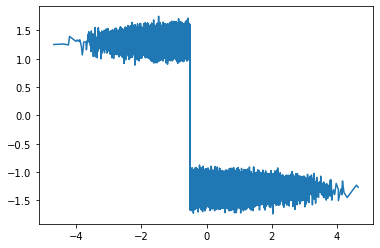

In [13]:
(thetan, an, bn) = generate.generate_single_layer_v2(M, d, num)
(X, Y) = generate.generate_single_data_v2(T, an, bn, thetan, noise=0.1)
print(X.shape)
print(Y.shape)
plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
plt.show()

EPOCH 1:
LOSS train 0.42692684177309276 valid 0.1916784793138504
EPOCH 2:
LOSS train 0.12777655185200273 valid 0.09330287575721741
EPOCH 3:
LOSS train 0.0790505047654733 valid 0.07027868926525116
EPOCH 4:
LOSS train 0.06306332009844481 valid 0.05891786888241768
EPOCH 5:
LOSS train 0.05448831778485328 valid 0.05197574570775032
EPOCH 6:
LOSS train 0.04895750910509378 valid 0.047626517713069916
EPOCH 7:
LOSS train 0.045183368516154586 valid 0.044347912073135376
EPOCH 8:
LOSS train 0.04243503697216511 valid 0.04204775020480156
EPOCH 9:
LOSS train 0.04034025227883831 valid 0.04040294140577316
EPOCH 10:
LOSS train 0.03868289756355807 valid 0.03899582102894783
EPOCH 11:
LOSS train 0.037318649352528155 valid 0.0376846045255661
EPOCH 12:
LOSS train 0.03616903851507232 valid 0.036466099321842194
EPOCH 13:
LOSS train 0.03518386669456959 valid 0.035433314740657806
EPOCH 14:
LOSS train 0.034326933964621276 valid 0.034499503672122955
EPOCH 15:
LOSS train 0.03356764630880207 valid 0.03359519690275192

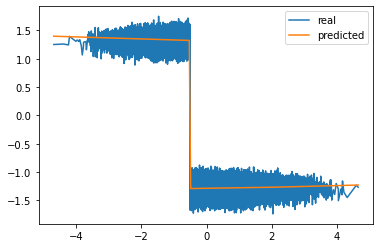

In [14]:
input = X[0]
plt.plot(*zip(*sorted(zip(X[0], Y[0]))))
(model, epoch_number, best_vloss, train_loss) = train_one_model(
    hidden_dim, X[0], Y[0], 
    val_ratio=0.2, 
    lr=lr, 
    batch_size=1024,
    patience=10, 
    epochs=200,
    verbose=True,
)
print(f"epochs: {epoch_number}, train loss: {train_loss} validation loss: {best_vloss}")
predicted = model(torch.Tensor(X[0])).detach().numpy()
plt.plot(*zip(*sorted(zip(X[0], predicted))))
plt.legend(["real"] + ["predicted"] * num_experiments)
plt.show()


## Experiment 2
- Data Generation: R1 -> R1, with only one activation unit
- model 
    - hidden_dim: [20]
    - lr: 0.01

In [45]:
# Constants
d = 10
M = 10
num = 1
T = 204800

lr = 0.01
hidden_dim = [20]

In [46]:
(thetan, an, bn) = generate.generate_single_layer_v2(M, d, num)
(X, Y) = generate.generate_single_data_v2(T, an, bn, thetan, noise=0.1)
print(X.shape)
print(Y.shape)

(1, 204800, 10)
(1, 204800)


In [50]:
(model, epoch_number, best_vloss, train_loss) = train_one_model(
    [80, 80, 40], X[0], Y[0], 
    val_ratio=0.2, 
    lr=lr, 
    batch_size=4096,
    patience=20, 
    epochs=1000,
    verbose = True,
)
print(f"epochs: {epoch_number}, train loss: {train_loss} validation loss: {best_vloss}")

EPOCH 1:
LOSS train 3.049885851144791 valid 1.9873409271240234
EPOCH 2:
LOSS train 1.5380349338054657 valid 1.0772897005081177
EPOCH 3:
LOSS train 0.8167761862277985 valid 0.6464296579360962
EPOCH 4:
LOSS train 0.5562571376562119 valid 0.4324077069759369
EPOCH 5:
LOSS train 0.49974408000707626 valid 0.38451921939849854
EPOCH 6:
LOSS train 0.331041307002306 valid 0.2862739562988281
EPOCH 7:
LOSS train 0.3609988451004028 valid 0.25849485397338867
EPOCH 8:
LOSS train 0.2416432373225689 valid 0.22731177508831024
EPOCH 9:
LOSS train 0.30199266485869886 valid 0.2298302948474884
EPOCH 10:
LOSS train 0.20015161111950874 valid 0.1833837479352951
EPOCH 11:
LOSS train 0.236071802303195 valid 0.18178941309452057
EPOCH 12:
LOSS train 0.17114981450140476 valid 0.16511616110801697
EPOCH 13:
LOSS train 0.23022326417267322 valid 0.16524186730384827
EPOCH 14:
LOSS train 0.1536278620362282 valid 0.14604762196540833
EPOCH 15:
LOSS train 0.2665235627442598 valid 0.17348270118236542
EPOCH 16:
LOSS train 0.1